In [50]:
# Using a Hough transform to locate the ball in a given image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os,math

In [97]:
DIR_PATH = '../nba-3d-data/harden/view_0_alphapose/vis/'
IMAGE_PATH = '../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'

# ground truths
blue = 53
green = 76
red = 120
offset = 0.1

# BLUE = (blue-blue*offset,blue+blue*offset)
# GREEN = (green-green*offset,green+green*offset)
# RED = (red-red*offset,red+red*offset)

In [52]:
for root, dirs, files in os.walk(DIR_PATH):
    files.sort()

In [68]:
def ground_truth_distance(mean):
    _,b,g,r = mean
    return math.sqrt((blue-b)**2 + (green-g)**2 + (red-r)**2)
    

In [89]:
def get_mean_color(height,width,circle_coord,true_img):
    circle_mask = np.zeros((height,width),np.uint8)
    cv.circle(circle_mask,(circle_coord[0],circle_coord[1]),circle_coord[2],1,-1)
    return cv.mean(true_img, mask=circle_mask)[::-1]
    

In [100]:
def find_closest_match(all_circles,imgpath):
    bgr_img = cv.imread(imgpath,1)
    true_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
    height,width,depth=true_img.shape 
    
    min_dist = float('inf')
    closest_circle = None
    
    for circle_coord in all_circles:
        bgr_mean = get_mean_color(height,width,circle_coord,true_img)
        dist = ground_truth_distance(bgr_mean)
        if dist < min_dist: 
            closest_circle = circle_coord
            min_dist = dist
            print('circle_coord: ',circle_coord)
            print('min_dist: ', min_dist)
        
    return closest_circle

# validate_ball_color([580,244,10],IMAGE_PATH)
    

frame_00000.png
circle_coord:  [522 176  16]
min_dist:  109.05500426273709
circle_coord:  [794 124  16]
min_dist:  46.782017349966964
circle_coord:  [962 106  17]
min_dist:  44.0776850681033
circle_coord:  [284 124  17]
min_dist:  38.89454679203702
circle_coord:  [504 668  14]
min_dist:  34.8614336008134
circle_coord:  [264 144  10]
min_dist:  30.0337990897064


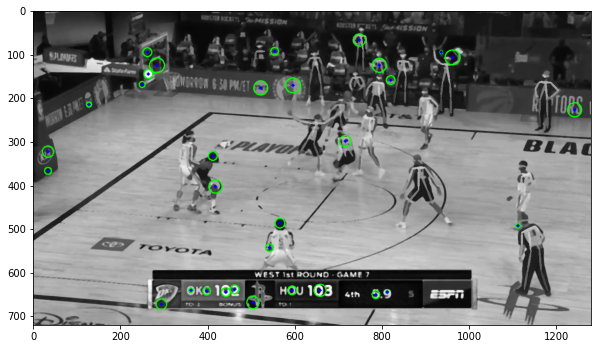

frame_00001.png
circle_coord:  [814 436  19]
min_dist:  96.4943462817333
circle_coord:  [382 370  19]
min_dist:  55.81786636229448
circle_coord:  [ 20 340  11]
min_dist:  50.79703255524069
circle_coord:  [418 400  14]
min_dist:  38.46736764897459
circle_coord:  [262 144   9]
min_dist:  31.372623372766306
circle_coord:  [874 338  10]
min_dist:  24.40815607485038
circle_coord:  [900 180   6]
min_dist:  12.730641388665777


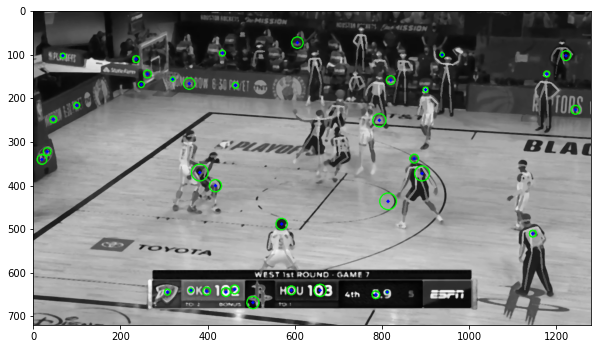

frame_00003.png
circle_coord:  [692 254  18]
min_dist:  26.64581720814788
circle_coord:  [858 380  12]
min_dist:  18.94326899217321
circle_coord:  [864 350   9]
min_dist:  17.432384557787525
circle_coord:  [910 188   6]
min_dist:  5.530923893583297


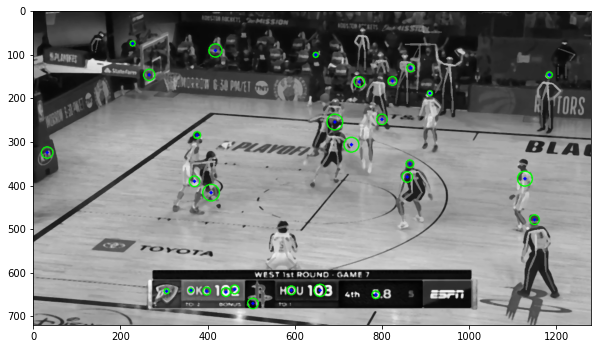

frame_00004.png
circle_coord:  [268  94  19]
min_dist:  54.23477030503806
circle_coord:  [754 160  19]
min_dist:  41.33477959655902
circle_coord:  [654 204  14]
min_dist:  14.474872355090724


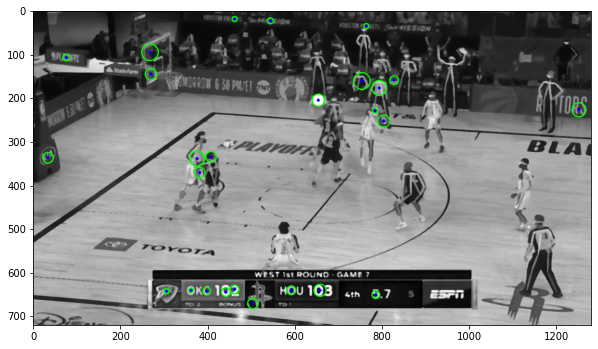

frame_00005.png
circle_coord:  [382 328  19]
min_dist:  102.17937412906534
circle_coord:  [798 166  19]
min_dist:  91.3848388239336
circle_coord:  [636 214  10]
min_dist:  13.528654781390898


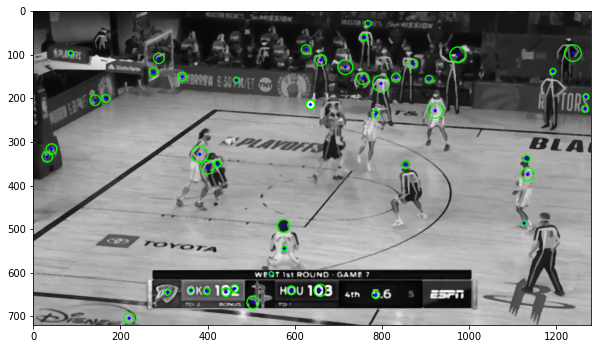

frame_00006.png
circle_coord:  [922 222  19]
min_dist:  148.9865929110832
circle_coord:  [504 668  17]
min_dist:  34.8134723793227
circle_coord:  [660  84   6]
min_dist:  27.179152304546488


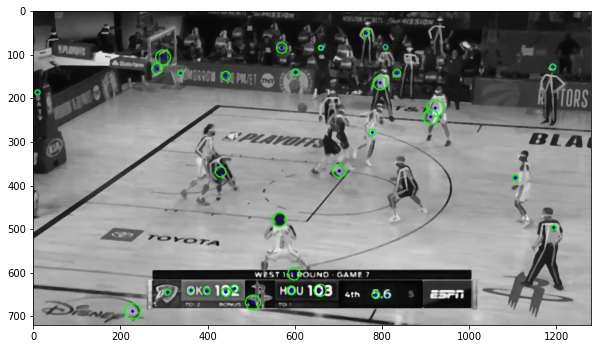

frame_00008.png
circle_coord:  [580 244  10]
min_dist:  0.30120814756163533


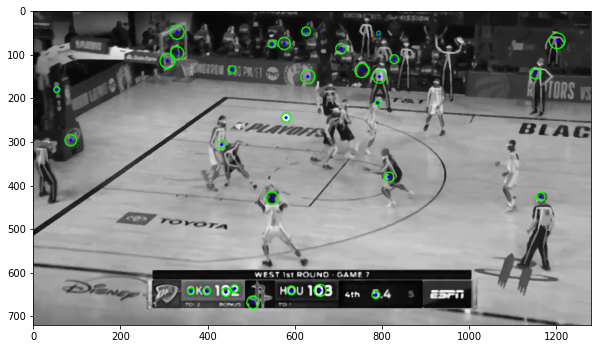

frame_00009.png
circle_coord:  [554 138  14]
min_dist:  111.95179857061987
circle_coord:  [754 126  16]
min_dist:  41.93550827271017
circle_coord:  [1150  110    7]
min_dist:  39.51786991033739
circle_coord:  [916   6   4]
min_dist:  37.32199456934079


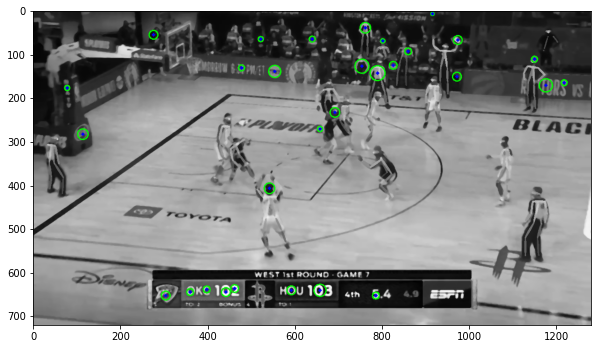

frame_00010.png
circle_coord:  [812 366  19]
min_dist:  17.5318484040396
circle_coord:  [544 286   9]
min_dist:  15.381947902243116


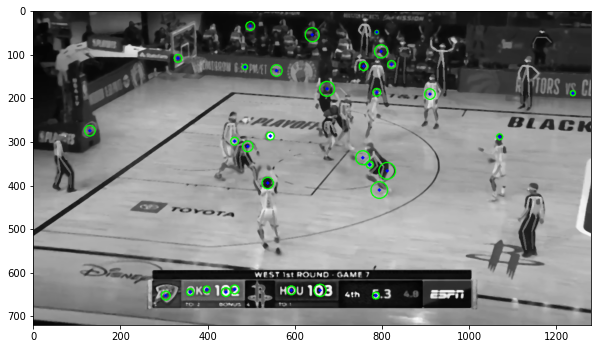

frame_00011.png
circle_coord:  [358  84  19]
min_dist:  50.872689147883484
circle_coord:  [1164   74   12]
min_dist:  40.21250894866857
circle_coord:  [1144  400   10]
min_dist:  34.913185043825024


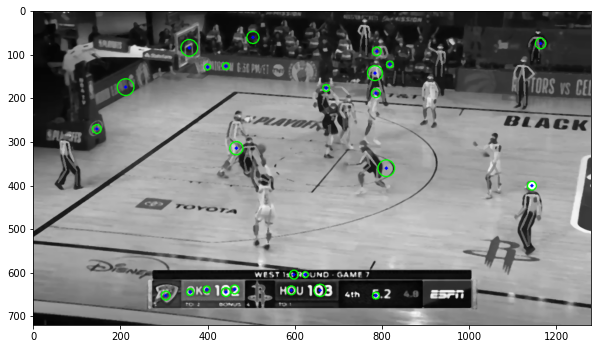

In [101]:
for f in files[:10]:
    fig = plt.figure(figsize=(10,10))
    print(f)
    img = cv.imread(DIR_PATH+f,0)
    img = cv.medianBlur(img,5)
    cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                                param1=70,param2=20,minRadius=0,maxRadius=20)
    circles = np.uint16(np.around(circles))
    ball = find_closest_match(circles[0],DIR_PATH+f)
    cv.circle(cimg,(ball[0],ball[1]),ball[2],(255,255,255),-1)
    
    for i in circles[0,:]:
        cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
    plt.imshow(cimg)
    plt.show()



In [90]:
# CODE BELOW THIS IS FOR TESTING, IT IS NOT ORGANIZED 

In [93]:
def test_find_closest_match(circle_coord,imgpath='../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'):
    bgr_img = cv.imread(imgpath,1)
    true_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
    height,width,depth=true_img.shape 
    
    min_dist = float('inf')
    closest_circle = None

    circle_mask = np.zeros((height,width),np.uint8)
    cv.circle(circle_mask,(circle_coord[0],circle_coord[1]),circle_coord[2],1,-1)
    bgr_mean = cv.mean(true_img, mask=circle_mask)[::-1]
    return bgr_mean


    dist = ground_truth_distance(bgr_mean)
    if dist < min_dist: 
        closest_circle = circle_coord
        min_dist = dist
        print(dist)
        
    return closest_circle

# validate_ball_color([580,244,10],IMAGE_PATH)
    

circle_coord:  [580 244  10]
min_dist:  0.30120814756163533
[580 244  10]
(0.0, 53.09148264984227, 75.7602523659306, 119.84227129337539)


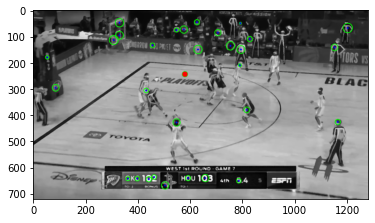

In [98]:
WORKING_IMAGE_PATH = '../nba-3d-data/harden/view_0_alphapose/vis/frame_00008.png'
REAL = [580,244,10]
FAKE = [794,150,15]

img = cv.imread(WORKING_IMAGE_PATH,0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=70,param2=20,minRadius=0,maxRadius=20)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#         # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
t = [580,244,10]
cv.circle(cimg,(t[0],t[1]),t[2],(255,0,0),-1)

fake_best = find_closest_match(circles[0],WORKING_IMAGE_PATH)
print(fake_best)


best = test_find_closest_match(t)
print(best)





    
plt.imshow(cimg)
plt.show()

In [99]:
real_bgr = test_find_closest_match(REAL)
fake_bgr = test_find_closest_match(FAKE)
print(f'real bgr is {real_bgr}')
print(f'fake bgr is {fake_bgr}')
print(f'real distance is {ground_truth_distance(real_bgr)}')
print(f'fake distance is {ground_truth_distance(fake_bgr)}')


real bgr is (0.0, 53.09148264984227, 75.7602523659306, 119.84227129337539)
fake bgr is (0.0, 130.72355430183356, 131.60225669957686, 133.41607898448518)
real distance is 0.30120814756163533
fake distance is 96.50157003237645
